## PTT 文章看板分類

In [16]:
import requests

def check_crawler_blocked(url):
    response = requests.get(url)
    
    # 檢查是否被阻擋
    if response.status_code == 403:
        print("block")
        # 顯示錯誤訊息
        print(response.text)
    elif response.status_code == 200:
        print("ok")
    else:
        print("unknown error: ", response.status_code)

# 要檢測的網址
url = 'https://www.ptt.cc'
# 執行檢測
check_crawler_blocked(url)

ok


In [61]:
import requests

def check_crawler_blocked(url):
    response = requests.get(url)
    
    if response.status_code == 403: # 檢查是否被阻擋
        print("block")
        #print(response.text)
    elif response.status_code == 200:
        print("ok")
    else:
        print("unknown error: ", response.status_code)

url = 'https://www.dcard.tw'
check_crawler_blocked(url)

block


In [11]:
import requests
from bs4 import BeautifulSoup
import json
import os

def crawl_ptt_articles(board, pages):
    base_url = 'https://www.ptt.cc'
    articles = []

    for i in range(pages):
        url = f'{base_url}/bbs/{board}/index{i+1}.html'
        response = requests.get(url, cookies={'over18': '1'})
        soup = BeautifulSoup(response.text, 'html.parser')

        for article in soup.find_all('div', class_='r-ent'):
            title_element = article.find('div', class_='title')
            if title_element is None:
                continue

            title = title_element.text.strip()
            href = title_element.find('a')['href']
            full_url = base_url + href
            
            article_response = requests.get(full_url, cookies={'over18': '1'})
            article_soup = BeautifulSoup(article_response.text, 'html.parser')
            content_element = article_soup.find('div', id='main-content')
            
            if content_element is not None:
                # Remove unnecessary elements
                for element in content_element.find_all(['div', 'span']):
                    element.decompose()
                # Remove author and board information from content
                content = content_element.text.strip()
                content = content.split('\n', maxsplit=9)[-1]
            else:
                content = ''

            articles.append({'type': board, 'title': title, 'url': full_url, 'content': content})

    return articles

### 10種看板
##### 1. Gossiping (八卦板)：時事、八卦、社會議題。
##### 2. Tech_Job (科技業板)：科技產業、職涯發展、工作相關的話題。
##### 3. C_Chat (閒談板)：一般討論、生活話題、文化、娛樂、旅遊等話題。
##### 4. Movie (電影板)：電影評論、討論電影相關話題。
##### 5. Stock (股票板)：股市、投資、股票相關議題。
##### 6. Beauty (表特板)：分享帥哥美女等相關話題。
##### 7. Food (美食板)：美食、食譜、餐廳評論。
##### 8. Travel (旅遊板)：旅遊景點、行程分享、旅行心得。
##### 9. Music (音樂板)：音樂、歌手、音樂活動等相關話題。
##### 10. NBA (籃球板)：NBA 相關賽事、球隊、球星。

## Collecting Data

In [41]:
articles = crawl_ptt_articles('NBA', 10)

file_path = 'ptt_data.json'
if os.path.exists(file_path): #if json exist
    with open(file_path, 'r', encoding='utf-8') as file:
        existing_data = json.load(file)
    
    existing_data += articles # 新的附加在後面
    
    with open(file_path, 'w', encoding='utf-8') as file:
        json.dump(existing_data, file, ensure_ascii=False, indent=4)
else:
    with open(file_path, 'w', encoding='utf-8') as file:
        json.dump(articles, file, ensure_ascii=False, indent=4)

print('ok')

ok


## WordCloud

In [59]:
articles = crawl_ptt_articles('Tech_Job', 10)
file_path = 'Tech_Job.json'

if os.path.exists(file_path): #if json exist
    with open(file_path, 'r', encoding='utf-8') as file:
        existing_data = json.load(file)
    
    existing_data += articles # 新的附加在後面
    
    with open(file_path, 'w', encoding='utf-8') as file:
        json.dump(existing_data, file, ensure_ascii=False, indent=4)
else:
    with open(file_path, 'w', encoding='utf-8') as file:
        json.dump(articles, file, ensure_ascii=False, indent=4)

print('ok')

ok


### 1. Gossiping (八卦板)

In [131]:
import jieba.analyse
with open('Gossiping.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

contents = [article['content'] for article in data]
text = ' '.join(contents) # 合併變字串
text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z0-9\s]', '', text) # 移除標點符號、數字
text = re.sub(r'(http|https)?:\/\/[^\s]+', '', text) # 移除連結
result = jieba.analyse.extract_tags(text, topK=100, withWeight=True)

for i in result:
    print('word:', i[0], 'TF-IDF:', i[1])

word: 因為 TF-IDF: 0.07494749276375653
word: 台灣 TF-IDF: 0.0578166372748979
word: 什麼 TF-IDF: 0.04325541010936806
word: 時候 TF-IDF: 0.04197059594770366
word: 這樣 TF-IDF: 0.037687882075489
word: 不過 TF-IDF: 0.03683133930104607
word: 還是 TF-IDF: 0.03468998236493874
word: 還有 TF-IDF: 0.03212035404160994
word: 老師 TF-IDF: 0.03212035404160994
word: 當時 TF-IDF: 0.029978997105502614
word: 同學 TF-IDF: 0.02740936878217382
word: 覺得 TF-IDF: 0.02698109739495235
word: 其實 TF-IDF: 0.024411469071623556
word: 孫越 TF-IDF: 0.02227011213551623
word: 應該 TF-IDF: 0.02184184074829476
word: 沈醫師 TF-IDF: 0.02184184074829476
word: 不會 TF-IDF: 0.020557026586630365
word: 現在 TF-IDF: 0.020557026586630365
word: 八卦 TF-IDF: 0.01934078561537508
word: 所以 TF-IDF: 0.01910279323697213
word: 吳鎮宇 TF-IDF: 0.0188439410377445
word: 一樣 TF-IDF: 0.018415669650523034
word: 美國 TF-IDF: 0.018415669650523034
word: 記者 TF-IDF: 0.018415669650523034
word: 結果 TF-IDF: 0.018415669650523034
word: 就是 TF-IDF: 0.018175225843352443
word: 醫師 TF-IDF: 0.017987398263

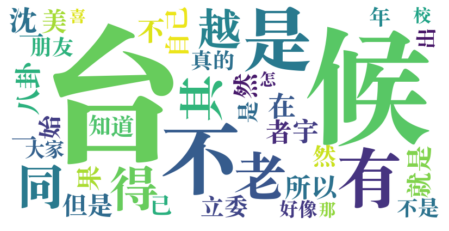

In [157]:
import jieba.analyse
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 設定停用詞檔案
jieba.analyse.set_stop_words('stopwords.txt')

with open('Gossiping.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

contents = [article['content'] for article in data]
text = ' '.join(contents)
text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z0-9\s]', '', text) # 移除標點符號、數字
text = re.sub(r'(http|https)?:\/\/[^\s]+', '', text) # 移除連結

result = jieba.analyse.extract_tags(text, topK=50, withWeight=True)

keywords = {i[0]: i[1] for i in result}
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/System/Library/Fonts/Supplemental/Songti.ttc').generate_from_frequencies(keywords)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 2. Tech_Job (科技業板)

In [132]:
import jieba.analyse
with open('Tech_Job.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

contents = [article['content'] for article in data]
text = ' '.join(contents) # 合併變字串
text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z0-9\s]', '', text) # 移除標點符號、數字
text = re.sub(r'(http|https)?:\/\/[^\s]+', '', text) # 移除連結
result = jieba.analyse.extract_tags(text, topK=100, withWeight=True)

for i in result:
    print('word:', i[0], 'TF-IDF:', i[1])

word: 問題 TF-IDF: 0.05987242983908532
word: 什麼 TF-IDF: 0.05736280703145899
word: 面試 TF-IDF: 0.0555702193117259
word: 公司 TF-IDF: 0.04717522880993912
word: 因為 TF-IDF: 0.04696579825700705
word: 時間 TF-IDF: 0.04158803509780777
word: 工作 TF-IDF: 0.038819724619697106
word: 還是 TF-IDF: 0.036927307026501724
word: 文章 TF-IDF: 0.03456220743767162
word: 主管 TF-IDF: 0.02975682491731174
word: 這樣 TF-IDF: 0.02760585088388964
word: 台灣 TF-IDF: 0.025454745620209926
word: 自己 TF-IDF: 0.02260999581279232
word: 不會 TF-IDF: 0.022228087724690357
word: 經驗 TF-IDF: 0.02151105263679712
word: 時候 TF-IDF: 0.020794017548903886
word: 不過 TF-IDF: 0.020435500004957266
word: 應該 TF-IDF: 0.019718464917064027
word: 怎麼 TF-IDF: 0.019359947373117407
word: 其實 TF-IDF: 0.019359947373117407
word: 覺得 TF-IDF: 0.01900142982917079
word: 還有 TF-IDF: 0.018642912285224172
word: 這麼 TF-IDF: 0.018284394741277552
word: 職場 TF-IDF: 0.018284394741277552
word: 開始 TF-IDF: 0.017925877197330936
word: 討論 TF-IDF: 0.017925877197330936
word: 板主 TF-IDF: 0.017208

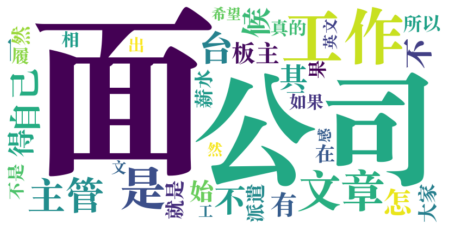

In [155]:
import jieba.analyse
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 設定停用詞檔案
jieba.analyse.set_stop_words('stopwords.txt')

with open('Tech_Job.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

contents = [article['content'] for article in data]
text = ' '.join(contents)
text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z0-9\s]', '', text) # 移除標點符號、數字
text = re.sub(r'(http|https)?:\/\/[^\s]+', '', text) # 移除連結

result = jieba.analyse.extract_tags(text, topK=50, withWeight=True)

keywords = {i[0]: i[1] for i in result}
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/System/Library/Fonts/Supplemental/Songti.ttc').generate_from_frequencies(keywords)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 3. C_Chat (閒談板)

In [133]:
import jieba.analyse
with open('C_Chat.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

contents = [article['content'] for article in data]
text = ' '.join(contents) # 合併變字串
text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z0-9\s]', '', text) # 移除標點符號、數字
text = re.sub(r'(http|https)?:\/\/[^\s]+', '', text) # 移除連結
result = jieba.analyse.extract_tags(text, topK=100, withWeight=True)

for i in result:
    print('word:', i[0], 'TF-IDF:', i[1])

word: 因為 TF-IDF: 0.05250309624048309
word: 不過 TF-IDF: 0.037814730030347944
word: 這樣 TF-IDF: 0.03500206416032206
word: 還是 TF-IDF: 0.032814435150301934
word: 什麼 TF-IDF: 0.032814435150301934
word: 遊戲 TF-IDF: 0.03093932457028468
word: 動畫 TF-IDF: 0.030314287710278928
word: 作品 TF-IDF: 0.029825806665373173
word: 問題 TF-IDF: 0.027814140270255923
word: XD TF-IDF: 0.026564066550244424
word: 應該 TF-IDF: 0.025626511260235796
word: 其實 TF-IDF: 0.024688955970227168
word: 雖然 TF-IDF: 0.02312636382021279
word: 設定 TF-IDF: 0.021563771670198413
word: 出現 TF-IDF: 0.021563771670198413
word: 這裡 TF-IDF: 0.02125125324019554
word: 還有 TF-IDF: 0.020626216380189785
word: 就是 TF-IDF: 0.020129410217665542
word: 漫畫 TF-IDF: 0.020001179520184036
word: 開始 TF-IDF: 0.018751105800172533
word: LP TF-IDF: 0.018438587370169658
word: 時候 TF-IDF: 0.01750103208016103
word: 時間 TF-IDF: 0.01750103208016103
word: 所以 TF-IDF: 0.017479942132531304
word: 討論 TF-IDF: 0.01687599522015528
word: 日本 TF-IDF: 0.016620405028490836
word: 不會 TF-IDF: 0.0

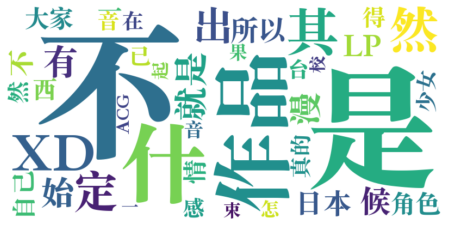

In [145]:
import jieba.analyse
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 設定停用詞檔案
jieba.analyse.set_stop_words('stopwords.txt')

with open('C_Chat.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

contents = [article['content'] for article in data]
text = ' '.join(contents)
text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z0-9\s]', '', text) # 移除標點符號、數字
text = re.sub(r'(http|https)?:\/\/[^\s]+', '', text) # 移除連結

result = jieba.analyse.extract_tags(text, topK=50, withWeight=True)

keywords = {i[0]: i[1] for i in result}
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/System/Library/Fonts/Supplemental/Songti.ttc').generate_from_frequencies(keywords)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 4. Movie (電影板)

In [134]:
import jieba.analyse
with open('Movie.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

contents = [article['content'] for article in data]
text = ' '.join(contents) # 合併變字串
text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z0-9\s]', '', text) # 移除標點符號、數字
text = re.sub(r'(http|https)?:\/\/[^\s]+', '', text) # 移除連結
result = jieba.analyse.extract_tags(text, topK=100, withWeight=True)

for i in result:
    print('word:', i[0], 'TF-IDF:', i[1])

word: 電影 TF-IDF: 0.10703660701728868
word: 因為 TF-IDF: 0.04596156046003498
word: 還是 TF-IDF: 0.03333248303633168
word: 不過 TF-IDF: 0.03312544898020539
word: 這樣 TF-IDF: 0.032297312755700254
word: 什麼 TF-IDF: 0.029398835969932285
word: 其實 TF-IDF: 0.027535529464795733
word: 導演 TF-IDF: 0.026086291071911745
word: 喜歡 TF-IDF: 0.026086291071911745
word: 雖然 TF-IDF: 0.025879257015785462
word: 還有 TF-IDF: 0.02567222295965918
word: 劇情 TF-IDF: 0.02463705267902776
word: 覺得 TF-IDF: 0.02463705267902776
word: 這部 TF-IDF: 0.02173857589325979
word: 角色 TF-IDF: 0.021282431760455814
word: 時候 TF-IDF: 0.020910439668754655
word: 一樣 TF-IDF: 0.020496371556502087
word: 這是 TF-IDF: 0.0202893375003758
word: 感覺 TF-IDF: 0.0202893375003758
word: 自己 TF-IDF: 0.0201951033701356
word: 觀眾 TF-IDF: 0.019461201275870667
word: 故事 TF-IDF: 0.01865483129169458
word: 本片 TF-IDF: 0.01863839708739414
word: 當然 TF-IDF: 0.018218996939112966
word: 出現 TF-IDF: 0.017804928826860397
word: 不會 TF-IDF: 0.017804928826860397
word: 就是 TF-IDF: 0.017510145

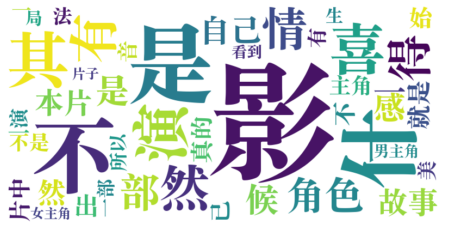

In [148]:
import jieba.analyse
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

jieba.analyse.set_stop_words('stopwords.txt')

with open('Movie.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

contents = [article['content'] for article in data]
text = ' '.join(contents)
text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z0-9\s]', '', text) # 移除標點符號、數字
text = re.sub(r'(http|https)?:\/\/[^\s]+', '', text) # 移除連結

result = jieba.analyse.extract_tags(text, topK=50, withWeight=True)

keywords = {i[0]: i[1] for i in result}
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/System/Library/Fonts/Supplemental/Songti.ttc').generate_from_frequencies(keywords)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 5. Stock (股票板)

In [135]:
import jieba.analyse
with open('Stock.json', 'r', encoding='utf-8') as file:
    data = json.load(file)
    
contents = [article['content'] for article in data]
text = ' '.join(contents) # 合併變字串
text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z0-9\s]', '', text) # 移除標點符號、數字
text = re.sub(r'(http|https)?:\/\/[^\s]+', '', text) # 移除連結
result = jieba.analyse.extract_tags(text, topK=100, withWeight=True)

for i in result:
    print('word:', i[0], 'TF-IDF:', i[1])

word: 市場 TF-IDF: 0.038407480165963924
word: 投資 TF-IDF: 0.035646158062528605
word: 因為 TF-IDF: 0.029872484573527494
word: 指數 TF-IDF: 0.026107045341570247
word: 股票 TF-IDF: 0.025605002520066356
word: 股價 TF-IDF: 0.021337488981091068
word: 價格 TF-IDF: 0.021086459698960586
word: 現金 TF-IDF: 0.0193292547240472
word: 台灣 TF-IDF: 0.01907822544191672
word: 內容 TF-IDF: 0.017321020467003338
word: 還是 TF-IDF: 0.017069991184872853
word: 公司 TF-IDF: 0.016773221912442307
word: 資料 TF-IDF: 0.01656793262061189
word: 10 TF-IDF: 0.01656793262061189
word: 經濟 TF-IDF: 0.01606587405635092
word: 什麼 TF-IDF: 0.01581484477422044
word: 美國 TF-IDF: 0.015563815492089956
word: 時間 TF-IDF: 0.015312786209959472
word: 影響 TF-IDF: 0.015312786209959472
word: 問題 TF-IDF: 0.015312786209959472
word: 參考 TF-IDF: 0.015061756927828988
word: 資產 TF-IDF: 0.015061756927828988
word: 指標 TF-IDF: 0.014810727645698506
word: 風險 TF-IDF: 0.014559698363568022
word: 趨勢 TF-IDF: 0.014308669081437539
word: 100 TF-IDF: 0.013806610517176573
word: 資金 TF-IDF: 0

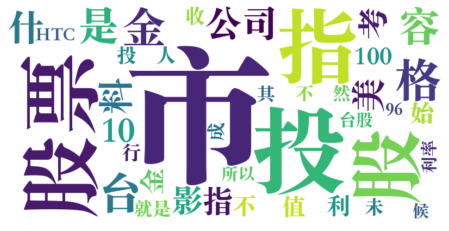

In [149]:
import jieba.analyse
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 設定停用詞檔案
jieba.analyse.set_stop_words('stopwords.txt')

with open('Stock.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

contents = [article['content'] for article in data]
text = ' '.join(contents)
text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z0-9\s]', '', text) # 移除標點符號、數字
text = re.sub(r'(http|https)?:\/\/[^\s]+', '', text) # 移除連結

result = jieba.analyse.extract_tags(text, topK=50, withWeight=True)

keywords = {i[0]: i[1] for i in result}
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/System/Library/Fonts/Supplemental/Songti.ttc').generate_from_frequencies(keywords)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 6. Beauty (顏值板)

In [142]:
import jieba.analyse
with open('Beauty.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

contents = [article['content'] for article in data]
text = ' '.join(contents) # 合併變字串
text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z\s]', '', text) # 移除標點符號、數字
text = re.sub(r'(http|https)?:\/\/[^\s]+', '', text) # 移除連結
result = jieba.analyse.extract_tags(text, topK=100, withWeight=True)

for i in result:
    print('word:', i[0], 'TF-IDF:', i[1])

word: 正妹 TF-IDF: 0.16577184539125675
word: No TF-IDF: 0.10644297440912276
word: 水桶 TF-IDF: 0.07736581748597869
word: 版主 TF-IDF: 0.06893122305142316
word: 相簿 TF-IDF: 0.05583893739494964
word: 投票 TF-IDF: 0.0482469246025135
word: 閒聊 TF-IDF: 0.04711410342698876
word: 時間 TF-IDF: 0.043624169839804404
word: 開放 TF-IDF: 0.043624169839804404
word: 文章 TF-IDF: 0.039638100560347396
word: 還是 TF-IDF: 0.038389269459027875
word: 網頁 TF-IDF: 0.038389269459027875
word: 美女 TF-IDF: 0.03797045233151365
word: 集氣 TF-IDF: 0.0366443026654357
word: 什麼 TF-IDF: 0.034899335871843525
word: 大家 TF-IDF: 0.03484213632235148
word: 因為 TF-IDF: 0.033154369078251346
word: 雖然 TF-IDF: 0.033154369078251346
word: 這樣 TF-IDF: 0.031409402284659174
word: littlesafe TF-IDF: 0.031409402284659174
word: 鄉民 TF-IDF: 0.031409402284659174
word: 表特 TF-IDF: 0.029664435491066996
word: 討論 TF-IDF: 0.02791946869747482
word: 覺得 TF-IDF: 0.02791946869747482
word: 應該 TF-IDF: 0.026174501903882645
word: httpwwwwretchccalbumshowphpigapbfp TF-IDF: 0.02617

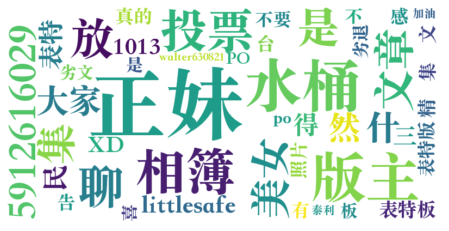

In [150]:
import jieba.analyse
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 設定停用詞檔案
jieba.analyse.set_stop_words('stopwords.txt')

with open('Beauty.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

contents = [article['content'] for article in data]
text = ' '.join(contents)
text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z0-9\s]', '', text) # 移除標點符號、數字
text = re.sub(r'(http|https)?:\/\/[^\s]+', '', text) # 移除連結

result = jieba.analyse.extract_tags(text, topK=50, withWeight=True)

keywords = {i[0]: i[1] for i in result}
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/System/Library/Fonts/Supplemental/Songti.ttc').generate_from_frequencies(keywords)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 7. Food (美食板)

In [137]:
import jieba.analyse
with open('Food.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

contents = [article['content'] for article in data]
text = ' '.join(contents) # 合併變字串
text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z0-9\s]', '', text) # 移除標點符號、數字
text = re.sub(r'(http|https)?:\/\/[^\s]+', '', text) # 移除連結
result = jieba.analyse.extract_tags(text, topK=100, withWeight=True)

for i in result:
    print('word:', i[0], 'TF-IDF:', i[1])

word: 不過 TF-IDF: 0.0861934296691501
word: 因為 TF-IDF: 0.06044734028745591
word: 還有 TF-IDF: 0.05634289125559162
word: 好吃 TF-IDF: 0.04853220703227941
word: 起來 TF-IDF: 0.04776086146169356
word: 感覺 TF-IDF: 0.046641466271185116
word: 不錯 TF-IDF: 0.04514893935050719
word: 味道 TF-IDF: 0.04098251724670745
word: 還是 TF-IDF: 0.03880569993762602
word: 覺得 TF-IDF: 0.03880569993762602
word: 不會 TF-IDF: 0.03768630474711757
word: 有點 TF-IDF: 0.034701250905761725
word: 飲料 TF-IDF: 0.03358185571525328
word: 一點 TF-IDF: 0.0332087239850838
word: 雖然 TF-IDF: 0.03246246052474484
word: 什麼 TF-IDF: 0.0313430653342364
word: 一樣 TF-IDF: 0.0313430653342364
word: 沙拉 TF-IDF: 0.03058513763147726
word: 服務生 TF-IDF: 0.029850538413558475
word: 餐廳 TF-IDF: 0.029104274953219513
word: 甜點 TF-IDF: 0.029104274953219513
word: 東西 TF-IDF: 0.02873114322305003
word: 蛋糕 TF-IDF: 0.028301912874144637
word: 其實 TF-IDF: 0.02761174803254159
word: 推薦 TF-IDF: 0.02761174803254159
word: 口味 TF-IDF: 0.02727648980075252
word: 應該 TF-IDF: 0.0268654845722026

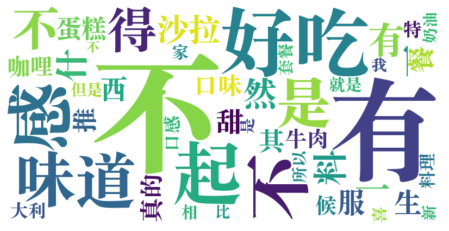

In [151]:
import jieba.analyse
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 設定停用詞檔案
jieba.analyse.set_stop_words('stopwords.txt')

with open('Food.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

contents = [article['content'] for article in data]
text = ' '.join(contents)
text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z0-9\s]', '', text) # 移除標點符號、數字
text = re.sub(r'(http|https)?:\/\/[^\s]+', '', text) # 移除連結

result = jieba.analyse.extract_tags(text, topK=50, withWeight=True)

keywords = {i[0]: i[1] for i in result}
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/System/Library/Fonts/Supplemental/Songti.ttc').generate_from_frequencies(keywords)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 8. Travel (旅遊板)

In [138]:
import jieba.analyse
with open('Travel.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

contents = [article['content'] for article in data]
text = ' '.join(contents) # 合併變字串
text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z0-9\s]', '', text)
text = re.sub(r'(http|https)?:\/\/[^\s]+', '', text)
result = jieba.analyse.extract_tags(text, topK=100, withWeight=True)

for i in result:
    print('word:', i[0], 'TF-IDF:', i[1])

word: 因為 TF-IDF: 0.05510730410320714
word: 不過 TF-IDF: 0.054814180145211354
word: 這裡 TF-IDF: 0.0439685936993674
word: 還有 TF-IDF: 0.039571734329430654
word: 時間 TF-IDF: 0.039571734329430654
word: 這樣 TF-IDF: 0.038106114539451744
word: 還是 TF-IDF: 0.032829883295527655
word: 台灣 TF-IDF: 0.02755365205160357
word: 時候 TF-IDF: 0.02755365205160357
word: 真的 TF-IDF: 0.024450087972574783
word: 其實 TF-IDF: 0.02432928851364996
word: 感覺 TF-IDF: 0.022570544765675264
word: 什麼 TF-IDF: 0.02227742080767948
word: 雖然 TF-IDF: 0.0219842968496837
word: 起來 TF-IDF: 0.0219842968496837
word: 一樣 TF-IDF: 0.021398048933692133
word: 行程 TF-IDF: 0.02049463446259072
word: 覺得 TF-IDF: 0.020225553101709003
word: 相當 TF-IDF: 0.01993242914371322
word: 已經 TF-IDF: 0.019639305185717437
word: 所以 TF-IDF: 0.018885564642503926
word: 發現 TF-IDF: 0.01875993331173009
word: 看到 TF-IDF: 0.018488758015073315
word: 飯店 TF-IDF: 0.018466809353734306
word: XD TF-IDF: 0.018466809353734306
word: 就是 TF-IDF: 0.01817440408479894
word: 有點 TF-IDF: 0.01729431

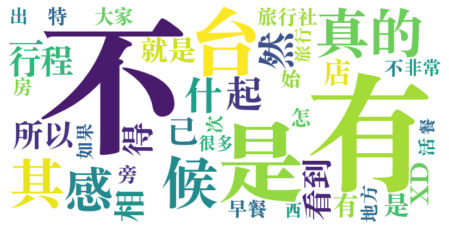

In [152]:
import jieba.analyse
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 設定停用詞檔案
jieba.analyse.set_stop_words('stopwords.txt')

with open('Travel.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

contents = [article['content'] for article in data]
text = ' '.join(contents)
text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z0-9\s]', '', text) # 移除標點符號、數字
text = re.sub(r'(http|https)?:\/\/[^\s]+', '', text) # 移除連結

result = jieba.analyse.extract_tags(text, topK=50, withWeight=True)

keywords = {i[0]: i[1] for i in result}
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/System/Library/Fonts/Supplemental/Songti.ttc').generate_from_frequencies(keywords)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 9. Music (音樂板)

In [139]:
import jieba.analyse
with open('Music.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

contents = [article['content'] for article in data]
text = ' '.join(contents) # 合併變字串
text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z0-9\s]', '', text) # 移除標點符號、數字
text = re.sub(r'(http|https)?:\/\/[^\s]+', '', text) # 移除連結
result = jieba.analyse.extract_tags(text, topK=100, withWeight=True)

for i in result:
    print('word:', i[0], 'TF-IDF:', i[1])

word: 音樂 TF-IDF: 0.08716681679133134
word: 61222136230 TF-IDF: 0.07425321430372671
word: 搖滾 TF-IDF: 0.07425321430372671
word: Joanna TF-IDF: 0.04519760870661625
word: 這牆 TF-IDF: 0.04519760870661625
word: 樂團 TF-IDF: 0.04196920808471509
word: 唱片 TF-IDF: 0.036949314713178506
word: 台北 TF-IDF: 0.036068995158736156
word: 魔戒 TF-IDF: 0.035667109023494466
word: 謝謝 TF-IDF: 0.03551240684091277
word: OPEN TF-IDF: 0.03551240684091277
word: 吉他 TF-IDF: 0.03361917513605185
word: 專輯 TF-IDF: 0.03228400621901161
word: TICKET TF-IDF: 0.03228400621901161
word: 交響 TF-IDF: 0.03228400621901161
word: 現場 TF-IDF: 0.02905560559711045
word: START TF-IDF: 0.02905560559711045
word: 樂器 TF-IDF: 0.02905560559711045
word: 台灣 TF-IDF: 0.02905560559711045
word: 時間 TF-IDF: 0.02905560559711045
word: 台北市 TF-IDF: 0.028758538864380234
word: 爵士舞 TF-IDF: 0.026277273444234407
word: 電影 TF-IDF: 0.025827204975209288
word: 活動 TF-IDF: 0.025827204975209288
word: 演出 TF-IDF: 0.025603711555009453
word: 討論 TF-IDF: 0.022598804353308126
word:

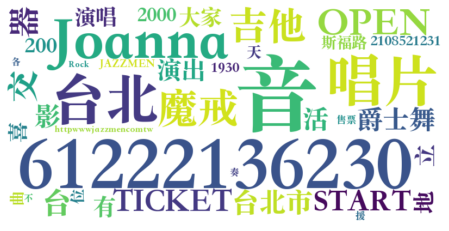

In [153]:
import jieba.analyse
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 設定停用詞檔案
jieba.analyse.set_stop_words('stopwords.txt')

with open('Music.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

contents = [article['content'] for article in data]
text = ' '.join(contents)
text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z0-9\s]', '', text) # 移除標點符號、數字
text = re.sub(r'(http|https)?:\/\/[^\s]+', '', text) # 移除連結

result = jieba.analyse.extract_tags(text, topK=50, withWeight=True)

keywords = {i[0]: i[1] for i in result}
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/System/Library/Fonts/Supplemental/Songti.ttc').generate_from_frequencies(keywords)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 10. NBA (籃球板)

In [140]:
import jieba.analyse
with open('NBA.json', 'r', encoding='utf-8') as file:
    data = json.load(file)
    
contents = [article['content'] for article in data]
text = ' '.join(contents) # 合併變字串
text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z0-9\s]', '', text) # 移除標點符號、數字
text = re.sub(r'(http|https)?:\/\/[^\s]+', '', text) # 移除連結
result = jieba.analyse.extract_tags(text, topK=100, withWeight=True)

for i in result:
    print('word:', i[0], 'TF-IDF:', i[1])

word: 球隊 TF-IDF: 0.06663224765156513
word: 防守 TF-IDF: 0.061497953491617595
word: 球員 TF-IDF: 0.06079912159452576
word: 還是 TF-IDF: 0.04823546547167173
word: 比賽 TF-IDF: 0.04161711090695398
word: NBA TF-IDF: 0.0398223028894034
word: 進攻 TF-IDF: 0.03959795188720958
word: 因為 TF-IDF: 0.03937360088501576
word: 籃板 TF-IDF: 0.03780314386965901
word: 季後賽 TF-IDF: 0.03354047482797639
word: 這樣 TF-IDF: 0.033091772823588744
word: 什麼 TF-IDF: 0.032194368814813454
word: 不過 TF-IDF: 0.031072613803844348
word: 時候 TF-IDF: 0.030175209795069057
word: 活塞 TF-IDF: 0.028549779450404985
word: 雖然 TF-IDF: 0.02826822627642157
word: 得分 TF-IDF: 0.02742730184612375
word: 表現 TF-IDF: 0.027370822267646283
word: 小牛 TF-IDF: 0.026422980356718837
word: 太陽 TF-IDF: 0.02501513674461115
word: 禁區 TF-IDF: 0.02467861024132042
word: 已經 TF-IDF: 0.024117732735835864
word: 七六 TF-IDF: 0.024072444681853582
word: 問題 TF-IDF: 0.02378120623254513
word: 一樣 TF-IDF: 0.021986398214994554
word: 不會 TF-IDF: 0.02131334520841309
word: 時間 TF-IDF: 0.0213133

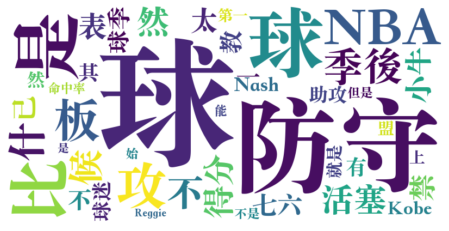

In [154]:
import jieba.analyse
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 設定停用詞檔案
jieba.analyse.set_stop_words('stopwords.txt')

with open('NBA.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

contents = [article['content'] for article in data]
text = ' '.join(contents)
text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z0-9\s]', '', text) # 移除標點符號、數字
text = re.sub(r'(http|https)?:\/\/[^\s]+', '', text) # 移除連結

result = jieba.analyse.extract_tags(text, topK=50, withWeight=True)

keywords = {i[0]: i[1] for i in result}
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/System/Library/Fonts/Supplemental/Songti.ttc').generate_from_frequencies(keywords)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Data Pre-processing

In [88]:
def load_json_data(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        data = json.load(file)
    texts = []
    labels = []
    for item in data:
        texts.append(item['content']) # 取content
        labels.append(item['type'])
    return texts, labels

In [89]:
def chinese_segmentation(texts): # 中文分詞
    segmented_texts = []
    for text in texts:
        segmented_text = ' '.join(jieba.cut(text))
        segmented_text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z0-9\s]', '', text) # 移除標點符號、數字
        segmented_text = re.sub(r'(http|https)?:\/\/[^\s]+', '', text) # 移除連結
        segmented_texts.append(segmented_text)
    return segmented_texts

In [90]:
texts, labels = load_json_data('ptt_data.json')
segmented_texts = chinese_segmentation(texts)

X_train, X_test, y_train, y_test = train_test_split(segmented_texts, labels, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer() # TF-IDF
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

## Training

### SVM

In [94]:
import jieba
import json
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train_vectorized, y_train)

y_pred = model.predict(X_test_vectorized)

accuracy = (y_pred == y_test).mean()
print(f"accuracy: {accuracy * 100} %")

accuracy: 79.5 %


In [74]:
import joblib
joblib.dump(model, 'svm_model.pkl')

['svm_model.pkl']

### Naive Bayes

In [93]:
import jieba
import json
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

y_pred = model.predict(X_test_vectorized)

accuracy = (y_pred == y_test).mean()
print(f"accuracy: {accuracy * 100} %")

accuracy: 73.0 %


In [76]:
import joblib
joblib.dump(model, 'nb_model.pkl')

['nb_model.pkl']

### Logistic Regression

In [77]:
import jieba
import json
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

y_pred = model.predict(X_test_vectorized)

accuracy = (y_pred == y_test).mean()
print(f"accuracy: {accuracy * 100} %")

accuracy: 77.75 %


In [78]:
import joblib
joblib.dump(model, 'lr_model.pkl')

['lr_model.pkl']

### Decision Tree

In [84]:
import jieba
import json
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train_vectorized, y_train)

y_pred = model.predict(X_test_vectorized)

accuracy = (y_pred == y_test).mean()
print(f"accuracy: {accuracy * 100} %")

accuracy: 56.25 %


In [85]:
import joblib
joblib.dump(model, 'dt_model.pkl')

['dt_model.pkl']

### Random Forest

In [98]:
import jieba
import json
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_vectorized, y_train)

y_pred = model.predict(X_test_vectorized)

accuracy = (y_pred == y_test).mean()
print(f"accuracy: {accuracy * 100} %")

accuracy: 70.5 %


In [99]:
import joblib
joblib.dump(model, 'rf_model.pkl')

['rf_model.pkl']

## Test Data

In [45]:
import requests
from bs4 import BeautifulSoup
import json
import os

def crawl_ptt_articles2(board, pages):
    base_url = 'https://www.ptt.cc'
    articles = []

    for i in range(pages):
        url = f'{base_url}/bbs/{board}/index{i+10}.html'
        response = requests.get(url, cookies={'over18': '1'})
        soup = BeautifulSoup(response.text, 'html.parser')

        for article in soup.find_all('div', class_='r-ent'):
            title_element = article.find('div', class_='title')
            if title_element is None:
                continue

            title = title_element.text.strip()
            href = title_element.find('a')['href']
            full_url = base_url + href
            
            article_response = requests.get(full_url, cookies={'over18': '1'})
            article_soup = BeautifulSoup(article_response.text, 'html.parser')
            content_element = article_soup.find('div', id='main-content')
            
            if content_element is not None:
                # Remove unnecessary elements
                for element in content_element.find_all(['div', 'span']):
                    element.decompose()
                # Remove author and board information from content
                content = content_element.text.strip()
                content = content.split('\n', maxsplit=9)[-1]
            else:
                content = ''

            articles.append({'type': board, 'title': title, 'url': full_url, 'content': content})

    return articles

In [55]:
articles = crawl_ptt_articles2('NBA', 2)
file_path = 'test_data.json'

if os.path.exists(file_path): # if json exist
    with open(file_path, 'r', encoding='utf-8') as file:
        existing_data = json.load(file)
    
    existing_data += articles # 新的附加在後面
    with open(file_path, 'w', encoding='utf-8') as file:
        json.dump(existing_data, file, ensure_ascii=False, indent=4)
else:
    with open(file_path, 'w', encoding='utf-8') as file:
        json.dump(articles, file, ensure_ascii=False, indent=4)

print('ok')

ok


## Test

In [113]:
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import joblib

vectorizer = TfidfVectorizer()
vectorizer = joblib.load('vectorizer.pkl')
svm_model = joblib.load('svm_model.pkl')
lr_model = joblib.load('lr_model.pkl')
nb_model = joblib.load('nb_model.pkl')
dt_model = joblib.load('dt_model.pkl')
rf_model = joblib.load('rf_model.pkl')

x = input("Please input a article: ")

segmented_text = ' '.join(jieba.cut(x))
vectorized_text = vectorizer.transform([segmented_text])
svm_prediction = svm_model.predict(vectorized_text)
lr_prediction = lr_model.predict(vectorized_text)
nb_prediction = nb_model.predict(vectorized_text)
dt_prediction = dt_model.predict(vectorized_text)
rf_prediction = rf_model.predict(vectorized_text)

print(f"\nSVM predict：{svm_prediction}")
print(f"\nLogistic Regression predict：{lr_prediction}")
print(f"\nNaive Bayes predict：{nb_prediction}")
print(f"\nDecision Tree predict：{dt_prediction}")
print(f"\nRandom Forest predict：{rf_prediction}")

Please input a article: \n2.僅剩xxx組.也是騙人的拉...都是利用消費者心態.讓消費者緊張\n  掉越快.感覺好像賣很好.大家也就會越想買...也是看看就好\n\n3.螢幕右下方通常會有僅剩xxx分鐘.這是視情況而定的.賣的好製作就會撐到最後一分鐘\n  賣不好.主持人就會說\"因為銷售太好了.目前已經銷售完畢.所以提早結束\"...\n  其實是賣不好被製作\"卡\"掉\n\n4.見證人通常是廠商找來的臨時演員...如果他常出現.表示他演的好.反之亦然\n\n5.最後一點.當它螢幕上打\"僅此一檔\"時.放心!!!絕對還有好幾檔!!有時頻率高到\n  隔3天同樣的東西又都出現了\n\n\n......\n\n--\n不要問我怎麼知道...因為我就是知道 >\"<\n--\n\n--\n◆ From: 218.160.28.167\n\n\n--\n◆ From: 218.160.40.109

SVM predict：['Travel']

Logistic Regression predict：['Gossiping']

Naive Bayes predict：['Travel']

Decision Tree predict：['Gossiping']

Random Forest predict：['Gossiping']
